In [1]:
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma

In [3]:
img = img_as_float(io.imread(r'attack_test\adv_images\advhorse.jpg', as_gray = False))

sigma_est = np.mean(estimate_sigma(img, channel_axis=2))

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est,
                               fast_mode=True,
                               patch_size=5,
                               patch_distance=3,
                               channel_axis=2)

In [4]:
from skimage import img_as_ubyte

img_as_8byte = img_as_ubyte(img)
denoise_img_as_8byte = img_as_ubyte(denoise_img)

original_img = cv2.cvtColor(img_as_8byte, cv2.COLOR_BGR2RGB)
final_denoised_img = cv2.cvtColor(denoise_img_as_8byte, cv2.COLOR_BGR2RGB)

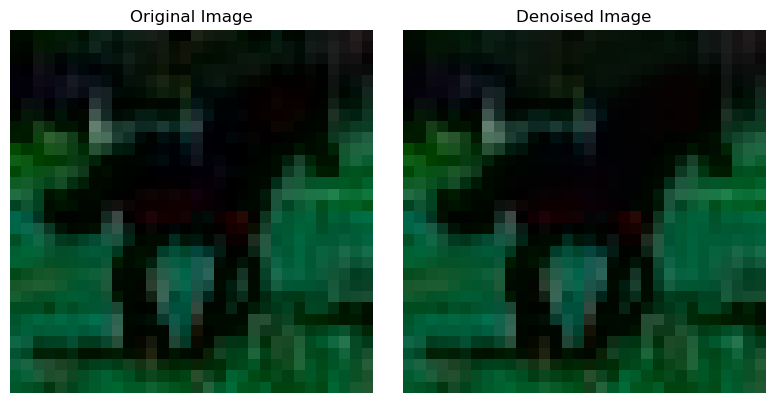

In [5]:
import matplotlib.pyplot as plt

# Display the original image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

# Display the denoised image
plt.subplot(1, 2, 2)
plt.imshow(final_denoised_img)
plt.title('Denoised Image')
plt.axis('off')

# Show the images
plt.tight_layout()
plt.show()

# Save the denoised image
# output_image_path = r'attack_test\org_denoise\nlm_img\nlm_truck.jpg' 
# cv2.imwrite(output_image_path, final_denoised_img)